In [1]:
import keras
from keras.layers import Conv2DTranspose
from keras.layers import UpSampling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Reshape
from keras.models import Sequential
import numpy as np
import pickle
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [38]:
with open("images_simple", "rb") as f:
    images = np.asarray(pickle.load(f))
with open("vectors_simple", "rb") as f:
    vectors = np.asarray(pickle.load(f))
vectors = vectors.reshape(vectors.shape[0], 4)
images[images > 0] = 1
images = images.reshape(images.shape[0], 28, 28, 1)

In [54]:
model = Sequential()

model.add(Dense(16, input_shape=(4,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Reshape((8, 8, 1)))
model.add(Conv2DTranspose(40, 4, input_shape=(8, 8, 1), data_format="channels_last"))
#model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(rate=.2))
#11
model.add(Conv2DTranspose(80, 4, data_format="channels_last"))
#model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(rate=.2))
#14
model.add(Conv2DTranspose(160, 4, data_format="channels_last"))
#model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(rate=.2))
#17
model.add(Conv2DTranspose(320, 4, data_format="channels_last"))
#model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(rate=.2))
#20
model.add(Conv2DTranspose(160, 4, data_format="channels_last"))
#model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(rate=.2))
#23
model.add(Conv2DTranspose(40, 4, data_format="channels_last"))
#model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(rate=.2))
#26
model.add(Conv2DTranspose(1, 3, data_format="channels_last"))
#model.add(BatchNormalization())
model.add(Activation("relu"))
#model.add(Dropout(rate=.2))
#28
model.compile(optimizer="adam", loss="binary_crossentropy")

In [55]:
model.fit(vectors, images, epochs=1, batch_size=32, validation_split=.2, shuffle=True)

Train on 8000 samples, validate on 2000 samples
Epoch 1/1
8000/8000 [==============================] - 514s 64ms/step - loss: 0.1112 - val_loss: 0.0999


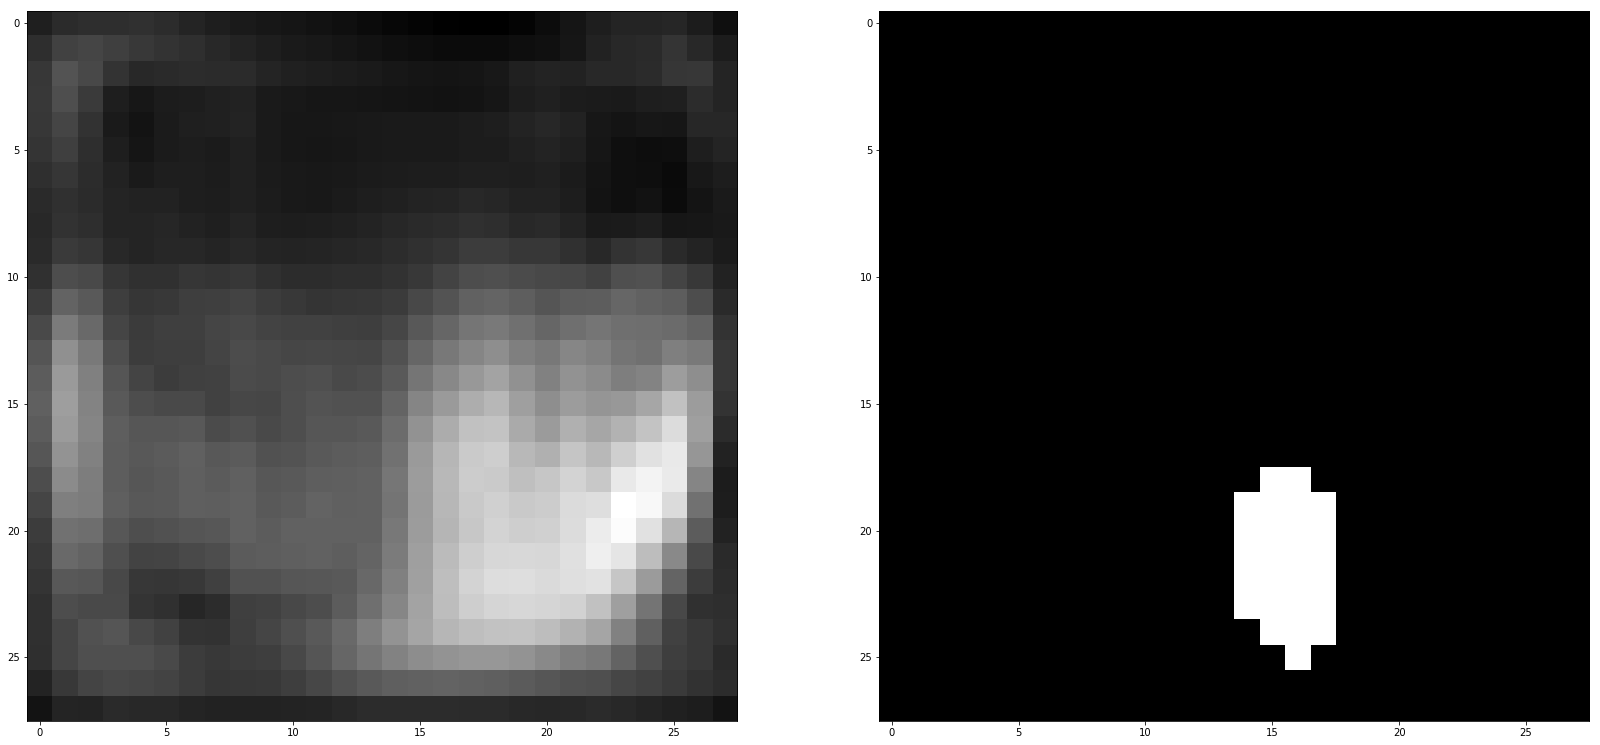

In [61]:
index = np.random.randint(vectors.shape[0])
sample = vectors[index].reshape((1, vectors[index].shape[0]))
prediction = model.predict(sample).reshape((28,28))
# prediction[prediction < .5] = 0
# prediction[prediction >= .5] = 1

fig=plt.figure(figsize=(28, 28))

fig.add_subplot(1, 2, 1)
plt.imshow(prediction, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(images[index].reshape((28, 28)), cmap='gray')

plt.show()